In [1]:
import os
os.chdir('/content/drive/MyDrive/ML/Data')

In [2]:
import pandas as pd
csv_data = pd.read_csv('heart_train.csv')
print(csv_data.shape)
csv_data.head()

(291, 15)


,id,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
csv_data = csv_data.drop(['id'], axis=1)
csv_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


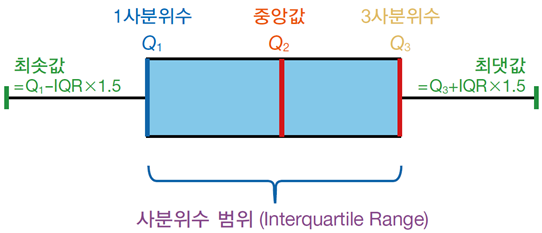

In [4]:
def find_outliers_per_class(df, class_column):
    outliers_mask = pd.Series([False] * len(df))
    for cls in df[class_column].unique():
        class_data = df[df[class_column] == cls]
        Q1 = class_data.quantile(0.25)
        Q3 = class_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((class_data < lower_bound) | (class_data > upper_bound)).any(axis=1)
        outliers_mask[outliers.index] = outliers_mask[outliers.index] | outliers
    return outliers_mask

In [5]:
def find_outliers(df):
    outliers = df[(df < 0) | (df > 3)].any(axis=1)
    return outliers

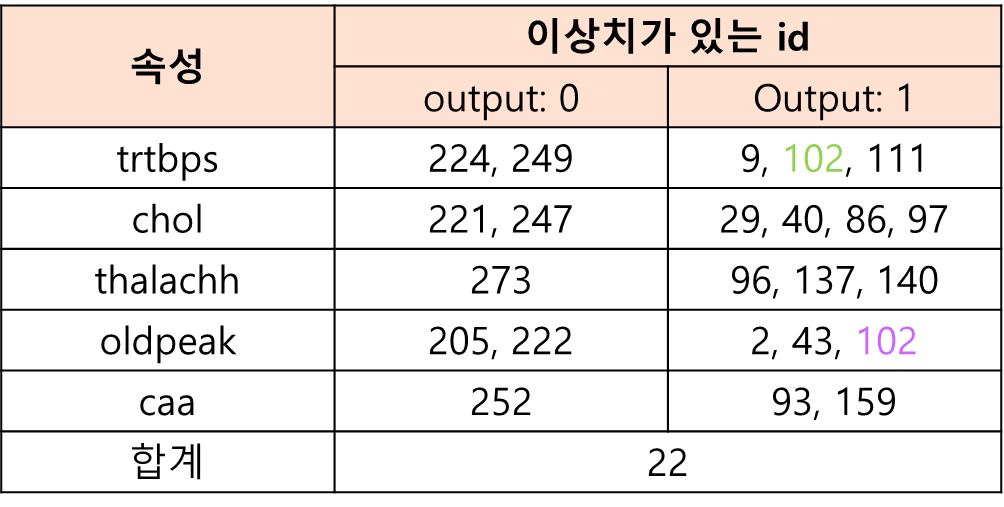

In [6]:
heart_data1 = csv_data[['trtbps',	'chol',	'thalachh',	'oldpeak', 'output']]
heart_data2 = csv_data[['caa']]

In [7]:
outliers_mask = find_outliers_per_class(heart_data1, 'output')
outlier_indices = heart_data1[outliers_mask].index.tolist()
print(f'Row numbers of outliers: {outlier_indices}')
print(len(outlier_indices))

Row numbers of outliers: [1, 8, 28, 39, 42, 85, 95, 96, 101, 110, 136, 139, 192, 208, 209, 211, 234, 236, 260]
19


In [8]:
outliers = find_outliers(heart_data2)
print(outliers.value_counts())

False    288
True       3
Name: count, dtype: int64


In [9]:
outliers = outliers | outliers_mask
print(outliers.value_counts())

False    269
True      22
Name: count, dtype: int64


In [10]:
csv_data_clean = csv_data[~outliers]
print(csv_data_clean.shape)

(269, 14)


In [11]:
heart_data = csv_data_clean.drop(['output'], axis=1)
heart_target = csv_data_clean['output']
print(heart_data.shape, heart_target.shape)

(269, 13) (269,)


In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(heart_data, heart_target, random_state=42)
print(train_data.shape, test_data.shape)

(201, 13) (68, 13)


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_data)
test_scaled = ss.transform(test_data)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_scaled, train_target)
print(model.score(test_scaled, test_target))

0.8823529411764706


###가우시안NB
설명:

* **Gaussian Naive Bayes(GaussianNB)**는 각 기능과 관련된 연속 값이 정규(가우스) 분포를 따른다고 가정

* 특징이 연속적이고 가우스 분포로 근사화될 수 있는 데이터세트에 특히 적합

In [16]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(train_scaled, train_target)
print(model2.score(test_scaled, test_target))

0.8382352941176471


###베르누이NB
설명:

* **Bernoulli Naive Bayes(BernoulliNB)**는 이진/부울 기능을 위해 설계되었음
* 각 기능은 이진 값(0 또는 1)이라고 가정하며 이진 용어 발생 표시기(예: 문서에 단어가 나타나는지 여부)가 있는 텍스트 분류 작업에 특히 유용

In [18]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
model3.fit(train_scaled, train_target)
print(model3.score(test_scaled, test_target))

0.9264705882352942


In [19]:
pred_data = pd.read_csv('heart_test.csv')
print(pred_data.shape)
pred_data.head()

(12, 15)


,id,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,160,56,1,1,130,221,0,0,163,0,0.0,2,0,3,NaN
1,161,56,1,1,120,240,0,1,169,0,0.0,0,0,2,NaN
2,162,55,0,1,132,342,0,1,166,0,1.2,2,0,2,NaN
3,163,41,1,1,120,157,0,1,182,0,0.0,2,0,2,NaN
4,164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,NaN


In [20]:
pred_data = pred_data.drop(['id', 'output'], axis=1)
print(pred_data.shape)
pred_data.head()

(12, 13)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,56,1,1,130,221,0,0,163,0,0.0,2,0,3
1,56,1,1,120,240,0,1,169,0,0.0,0,0,2
2,55,0,1,132,342,0,1,166,0,1.2,2,0,2
3,41,1,1,120,157,0,1,182,0,0.0,2,0,2
4,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [21]:
pred_scaled = ss.transform(pred_data)
print(pred_scaled.shape)

(12, 13)


In [22]:
print(model.predict(pred_scaled))

[1 1 1 1 0 0 0 0 0 0 0 1]


In [23]:
print(model2.predict(pred_scaled))

[1 1 1 1 0 0 0 0 0 0 0 0]


In [24]:
print(model3.predict(pred_scaled))

[1 1 1 1 1 1 0 0 0 0 0 0]
